In [1]:
import numpy as np
from sklearn.datasets import *
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from classifiers import SoftmaxClassifer,MaximumMarginClassifier
from util import spiral_data_gen
from plot import plot_linear_classifiers
from functions import softmax

# Train a Vanilla Neural Network

In [2]:
def NNClassifier(X,y,num_epoch=50_000,hidden_size=500,reg=0.0,step_size=.01,plot=False):
    X=X.T
    D,N=X.shape
    K=len(np.unique(y))
    
    # initialize parameters randomly
    h = hidden_size # size of hidden layer
    W = 0.01 * np.random.randn(h,D)
    b = np.zeros((h,1))
    W2 = 0.01 * np.random.randn(K,h)
    b2 = np.zeros((K,1))
    
    mode=num_epoch//10

    
    for i in range(num_epoch):
    
        # forward pass - compute predictions
        Z = np.maximum(0, W.dot(X)+ b)# ReLU
        S =softmax(W2.dot(Z) + b2)

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(S[y,range(N)])
        data_loss = np.sum(corect_logprobs)/N
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        
        if i % mode == 0:
            print("Epoch %d: loss %f" % (i, loss))


        # compute the gradient on predicted probs
        # Derivative of loss w.r.t. ouput of softmax.
        dS = S
        dS[y,range(N)] -= 1
        dS /= N

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2  
        dW2=dS.dot(Z.T)
        db2 = np.sum(dS, axis=1, keepdims=True)


        dZ=W2.T.dot(dS) 
        # backprop the ReLU non-linearity
        dZ[Z <= 0] = 0

        # finally into W,b

        dW=dZ.dot(X.T)
        db = np.sum(dZ, axis=1, keepdims=True)


        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    
 
    probs=softmax(W2.dot(np.maximum(0, W.dot(X)+ b)) + b2)    
    predicted_class = np.argmax(probs, axis=0)
    print(classification_report(y, predicted_class))

    
    if plot:
        X=X.T
        W=W.T
        W2=W2.T
        b2=b2.T
        b=b.T
        # plot the resulting classifier
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    

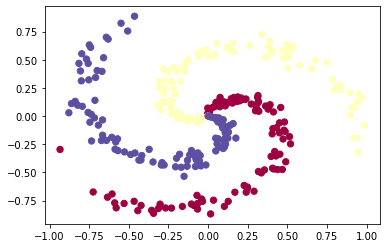

MaximumMarginClassifier training starts
training accuracy: 0.53
              precision    recall  f1-score   support

           0       0.47      0.57      0.51       100
           1       0.59      0.57      0.58       100
           2       0.55      0.45      0.49       100

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.54      0.53      0.53       300



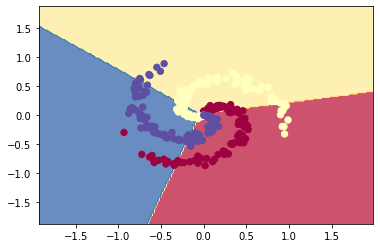

In [3]:
X,y=spiral_data_gen(True)
W=MaximumMarginClassifier(X,y)
plot_linear_classifiers(X,y,W)

Softmax training starts.
Epoch 0: Cost:1.1082804479385933
Epoch 5000: Cost:0.7526921494969188
Epoch 10000: Cost:0.7526921494969188
Epoch 15000: Cost:0.7526921494969188
Epoch 20000: Cost:0.7526921494969188
Epoch 25000: Cost:0.7526921494969188
Epoch 30000: Cost:0.7526921494969188
Epoch 35000: Cost:0.7526921494969188
Epoch 40000: Cost:0.7526921494969188
Epoch 45000: Cost:0.7526921494969188
training accuracy: 0.52
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       100
           1       0.57      0.55      0.56       100
           2       0.48      0.48      0.48       100

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



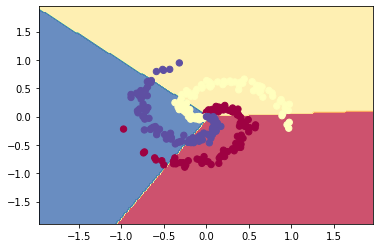

In [4]:
X,y=spiral_data_gen(False)
W=SoftmaxClassifer(X,y)
plot_linear_classifiers(X,y,W)

Epoch 0: loss 1.098410
Epoch 5000: loss 0.697754
Epoch 10000: loss 0.663013
Epoch 15000: loss 0.613181
Epoch 20000: loss 0.515077
Epoch 25000: loss 0.403297
Epoch 30000: loss 0.332112
Epoch 35000: loss 0.290950
Epoch 40000: loss 0.262478
Epoch 45000: loss 0.238598
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.92      0.91      0.91       100
           2       0.90      0.94      0.92       100

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



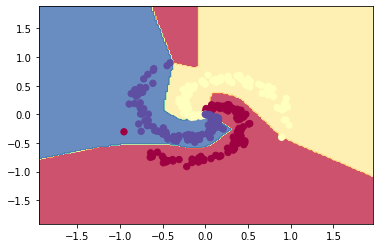

In [5]:
X,y=spiral_data_gen(False)
NNClassifier(X,y,plot=True)

# Wine Dataset

In [6]:
data = load_wine()
_=MaximumMarginClassifier(data['data'],data['target'])

MaximumMarginClassifier training starts
training accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        59
           1       0.90      0.97      0.93        71
           2       0.96      0.96      0.96        48

    accuracy                           0.94       178
   macro avg       0.95      0.94      0.95       178
weighted avg       0.95      0.94      0.94       178



In [7]:
_=SoftmaxClassifer(data['data'],data['target'])

Softmax training starts.
Epoch 0: Cost:1.0932232135223592
Epoch 5000: Cost:3.2697749663452873
Epoch 10000: Cost:2.959310684312371
Epoch 15000: Cost:2.493614261262997
Epoch 20000: Cost:2.131405932224595
Epoch 25000: Cost:1.9761737912081365
Epoch 30000: Cost:1.7691976031861925
Epoch 35000: Cost:1.8209416501916784
Epoch 40000: Cost:0.6825726160709853
Epoch 45000: Cost:0.6308285690654991
training accuracy: 0.90
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        59
           1       0.97      0.79      0.87        71
           2       0.94      1.00      0.97        48

    accuracy                           0.90       178
   macro avg       0.91      0.92      0.91       178
weighted avg       0.91      0.90      0.90       178



In [8]:
data = load_wine()
_=NNClassifier(data['data'],data['target'],
               num_epoch=100_000,
              step_size=.001,
              hidden_size=500)

Epoch 0: loss 1.560620
Epoch 10000: loss 0.534126
Epoch 20000: loss 1.299601
Epoch 30000: loss 0.343472
Epoch 40000: loss 0.431957
Epoch 50000: loss 0.336538
Epoch 60000: loss 0.252533
Epoch 70000: loss 0.327582
Epoch 80000: loss 0.354208
Epoch 90000: loss 0.255638
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        59
           1       0.76      0.97      0.85        71
           2       1.00      0.58      0.74        48

    accuracy                           0.84       178
   macro avg       0.89      0.82      0.83       178
weighted avg       0.87      0.84      0.84       178



In [9]:
# Thank you https://cs231n.github.io/neural-networks-case-study/